In [0]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
(X_train,_),(_,_)=mnist.load_data()
print(np.max(X_train))

255


In [0]:
X_train=(X_train.astype("float32")-127.5)/127.5
X_train.shape[0]/256

234.375

In [0]:
TOTAL_EPOCS=50
BATCH_SIZE=256
NO_OF_BATCHES=234
HALF_BATCH=128
NOISE_DIM=100
adam=Adam(lr=2e-4,beta_1=0.5)

In [0]:
#generator
Generator=Sequential()
Generator.add(Dense(256,input_shape=(NOISE_DIM,)))
Generator.add(LeakyReLU(0.2))

Generator.add(Dense(512))
Generator.add(LeakyReLU(0.2))

Generator.add(Dense(1024))
Generator.add(LeakyReLU(0.2))

Generator.add(Dense(784,activation="tanh"))
Generator.compile(loss="binary_crossentropy",optimizer=adam)

Generator.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_____________________

In [0]:
X_train=X_train.reshape(-1,784)
X_train.shape

(60000, 784)

In [0]:
#Discriminator

Discriminator=Sequential()

Discriminator.add(Dense(512,input_shape=(784,)))
Discriminator.add(LeakyReLU(0.2))
Discriminator.add(Dense(256))
Discriminator.add(LeakyReLU(0.2))
Discriminator.add(Dense(1,activation="sigmoid"))
Discriminator.compile(loss="binary_crossentropy",optimizer=adam)

Discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
Discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generated_image=Generator(gan_input)
gan_output=Discriminator(generated_image)

#Functional API
model=Model(gan_input,gan_output)
model.compile(loss="binary_crossentropy",optimizer=adam)


In [0]:
def save_imgs(epoch,samples=100):

  noise=np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_img=Generator.predict(noise)
  generated_imgs=generated_img.reshape(samples,28,28)

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation="nearest",cmap="gray")
    plt.axis("off")
  
  plt.tight_layout()
  plt.savefig("images/gan_output_epoch_{0}.png".format(epoch+1))
  plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'



Epoch 1 Disc Loss 0.6500 Generator Loss 0.9398


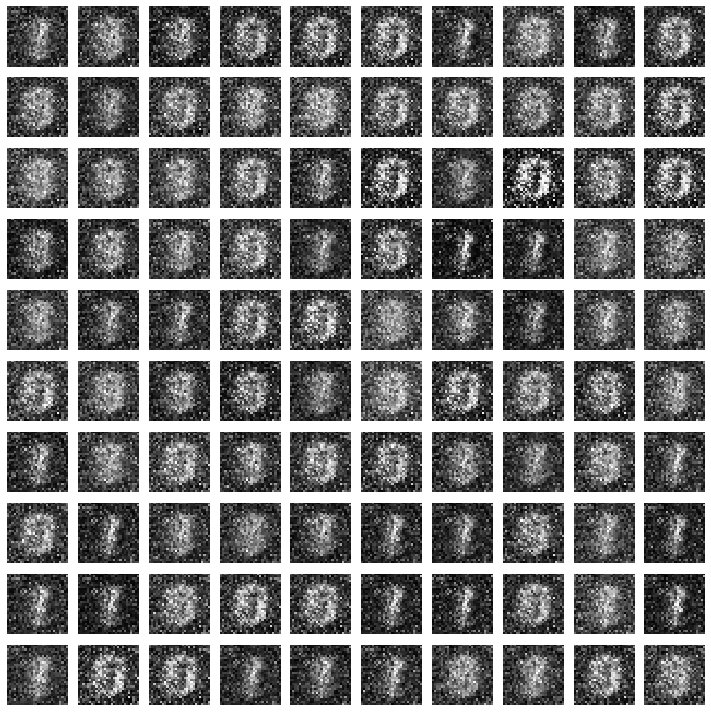

Epoch 2 Disc Loss 0.6343 Generator Loss 1.0604


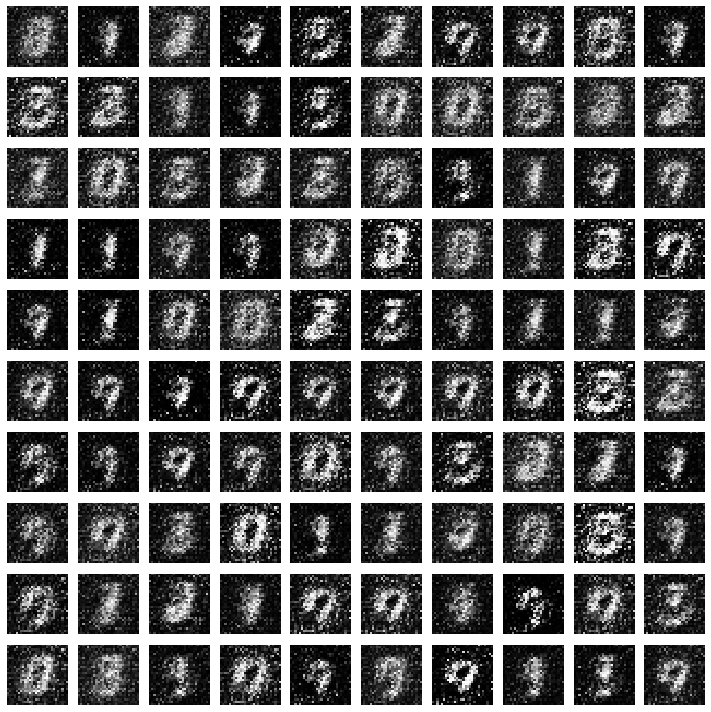

Epoch 3 Disc Loss 0.6348 Generator Loss 1.1022


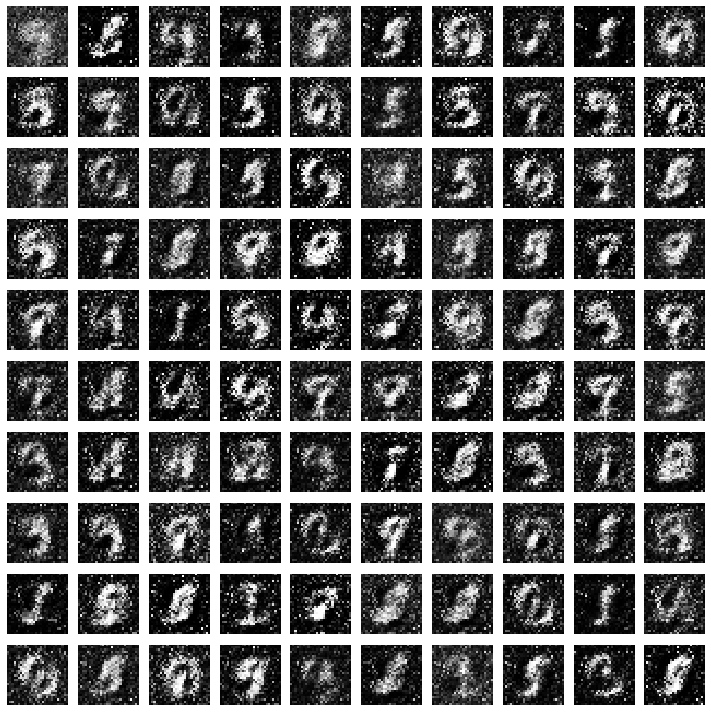

Epoch 4 Disc Loss 0.6135 Generator Loss 1.1979


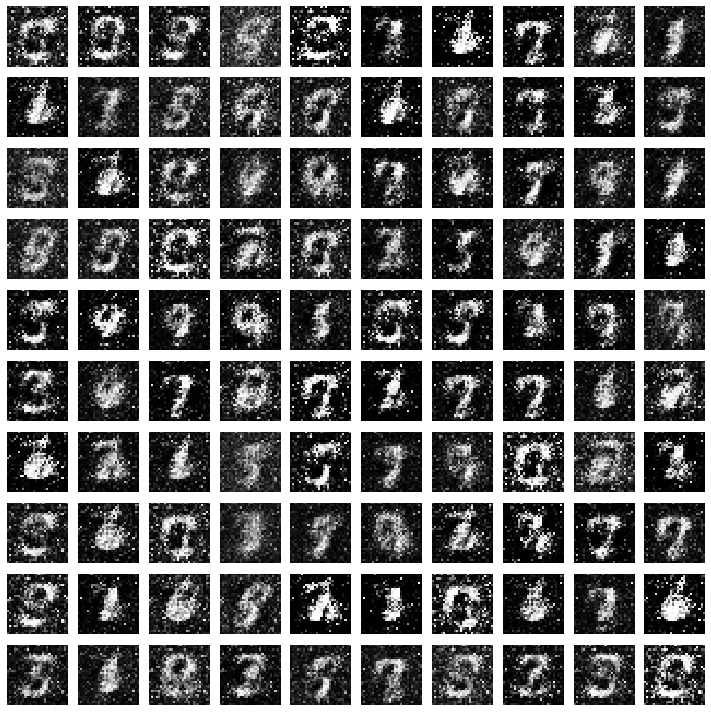

Epoch 5 Disc Loss 0.5943 Generator Loss 1.2388


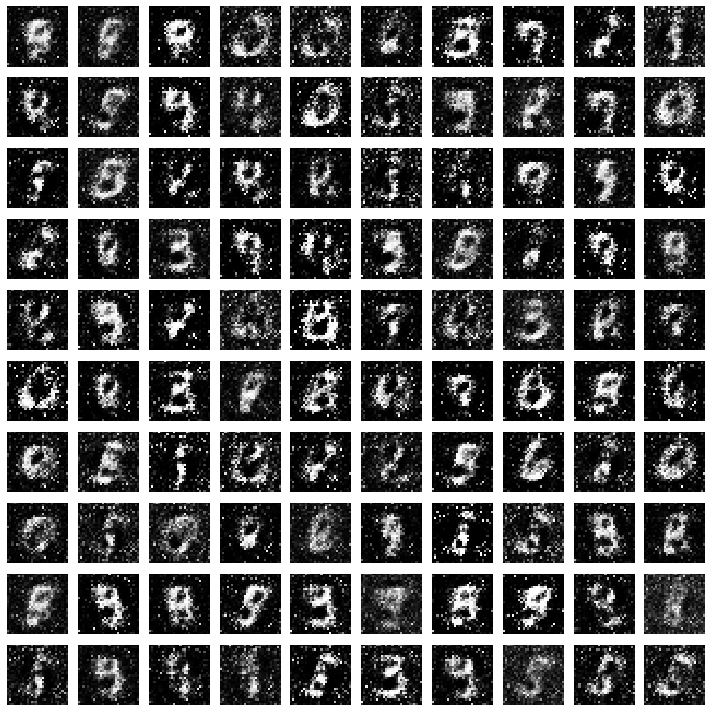

Epoch 6 Disc Loss 0.5717 Generator Loss 1.3209


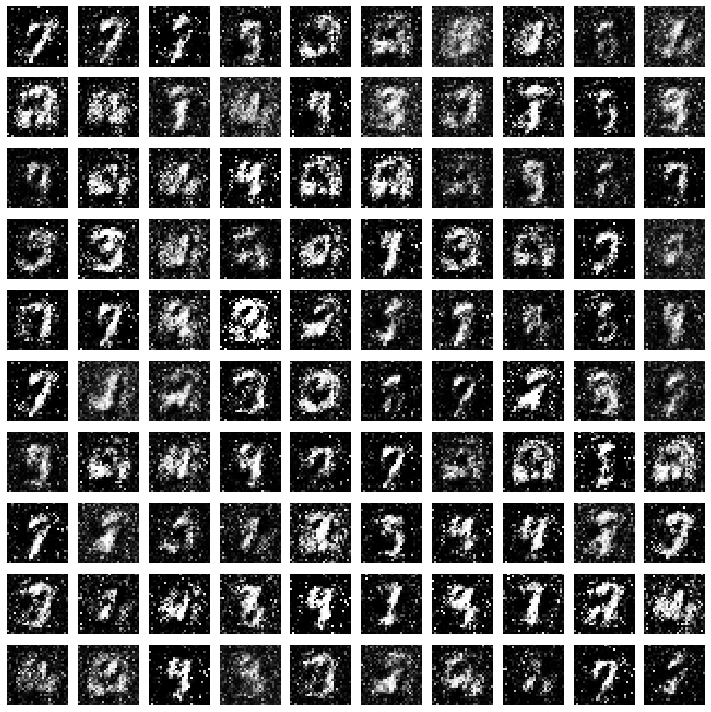

Epoch 7 Disc Loss 0.5565 Generator Loss 1.3670


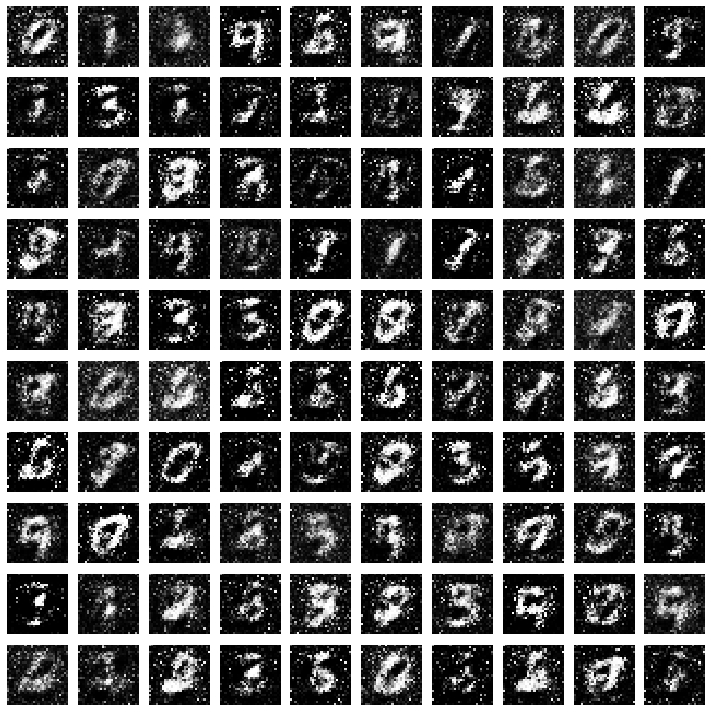

Epoch 8 Disc Loss 0.5530 Generator Loss 1.3403


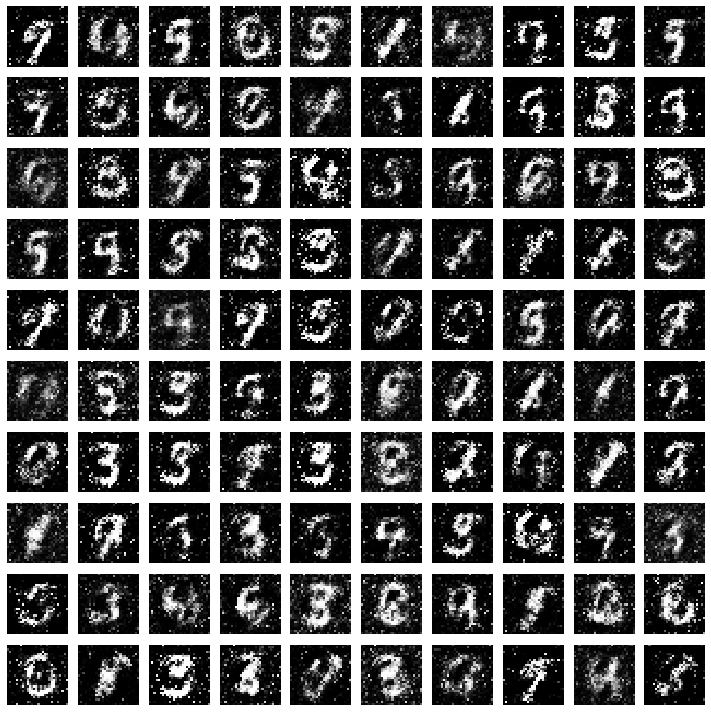

Epoch 9 Disc Loss 0.5654 Generator Loss 1.3207


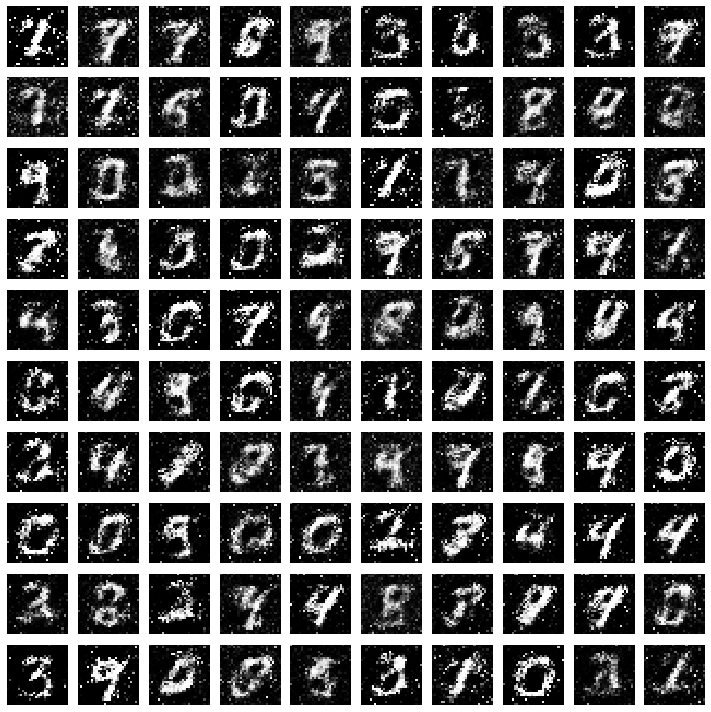

Epoch 10 Disc Loss 0.6131 Generator Loss 1.1358


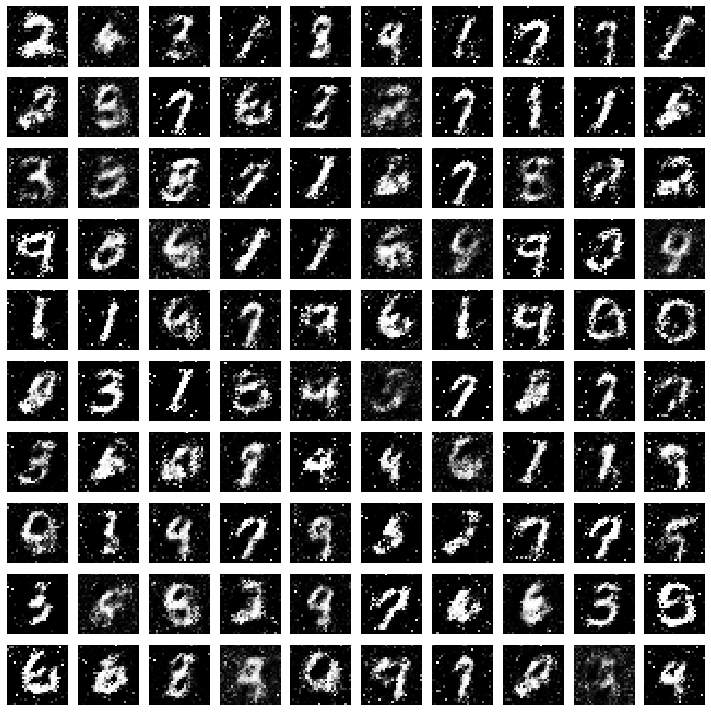

Epoch 11 Disc Loss 0.6212 Generator Loss 1.0948


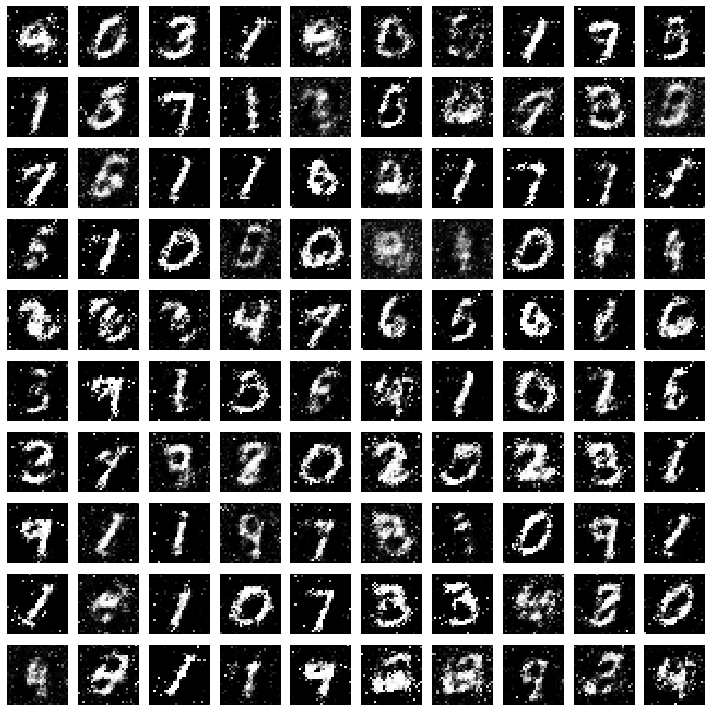

Epoch 12 Disc Loss 0.6333 Generator Loss 1.0665


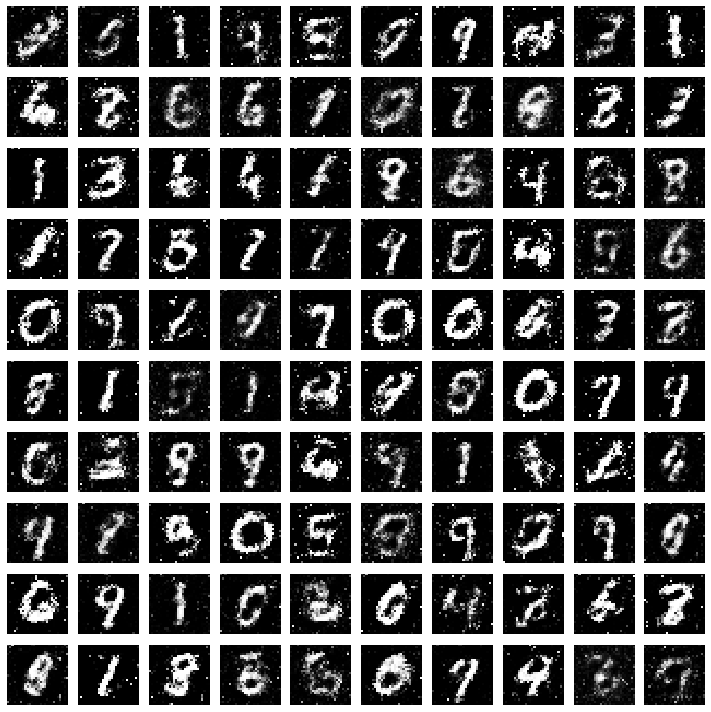

Epoch 13 Disc Loss 0.6410 Generator Loss 1.0335


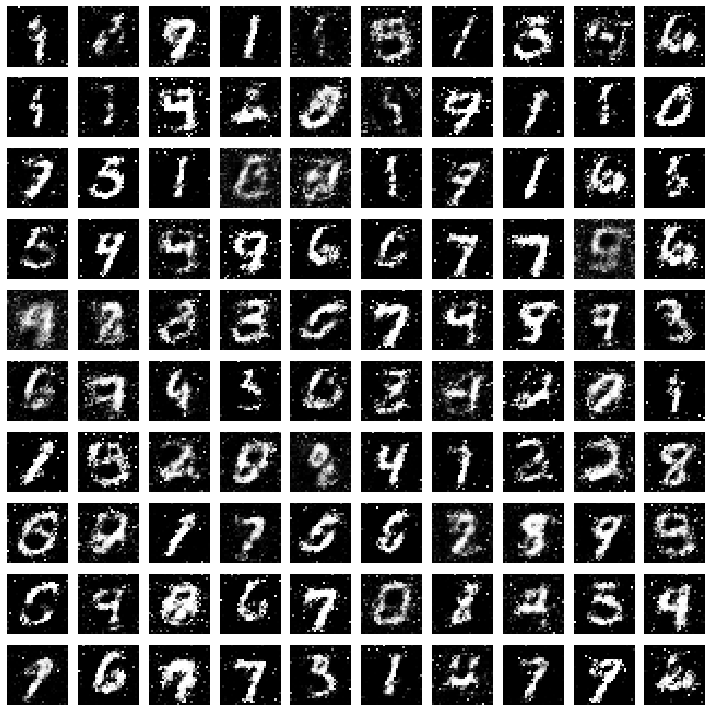

Epoch 14 Disc Loss 0.6441 Generator Loss 1.0231


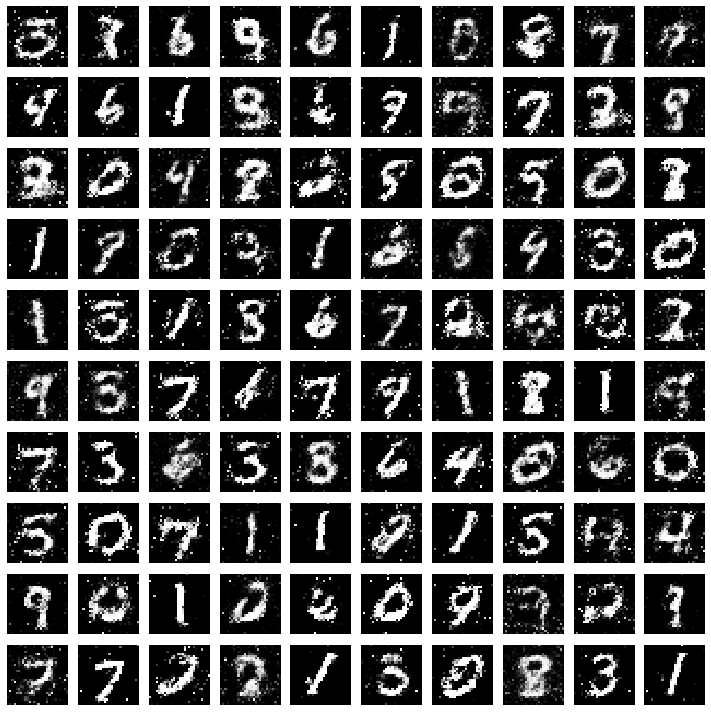

Epoch 15 Disc Loss 0.6419 Generator Loss 1.0248


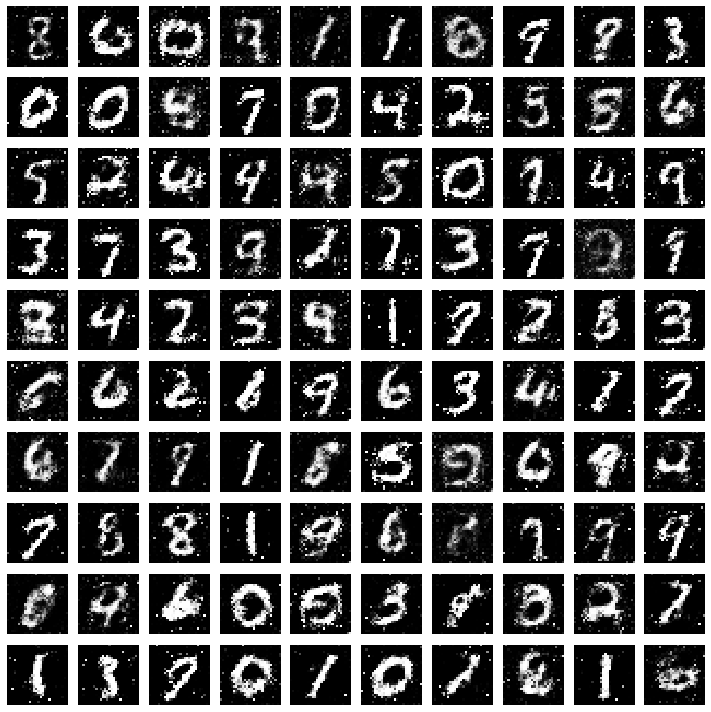

Epoch 16 Disc Loss 0.6429 Generator Loss 1.0296


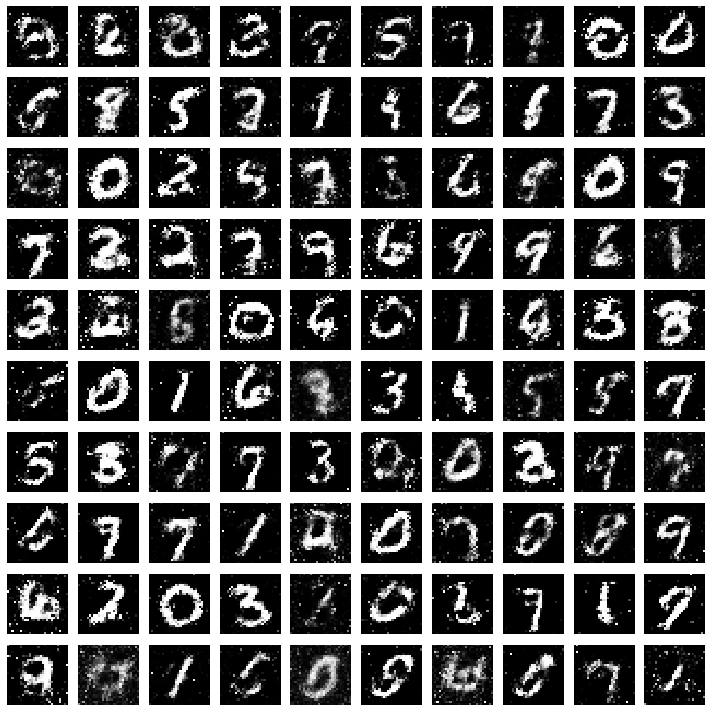

Epoch 17 Disc Loss 0.6423 Generator Loss 1.0374


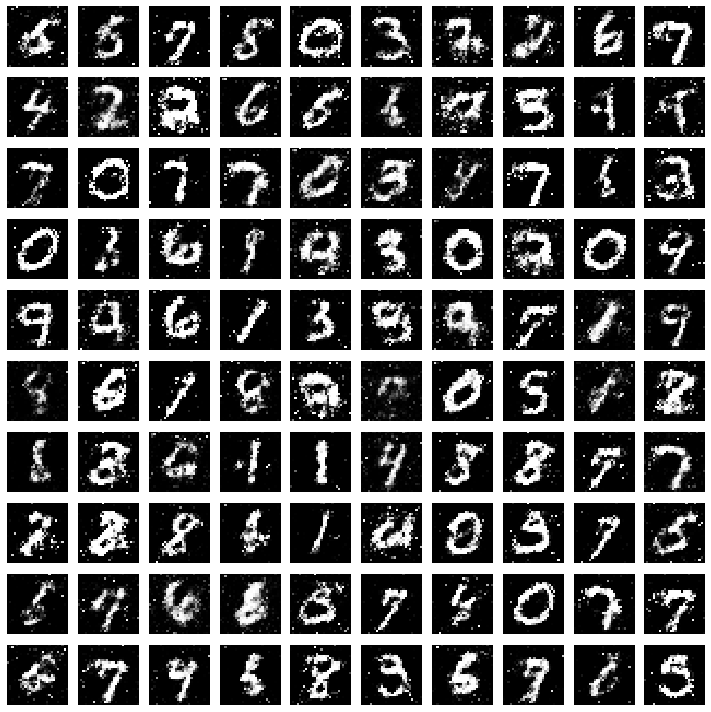

Epoch 18 Disc Loss 0.6459 Generator Loss 1.0261


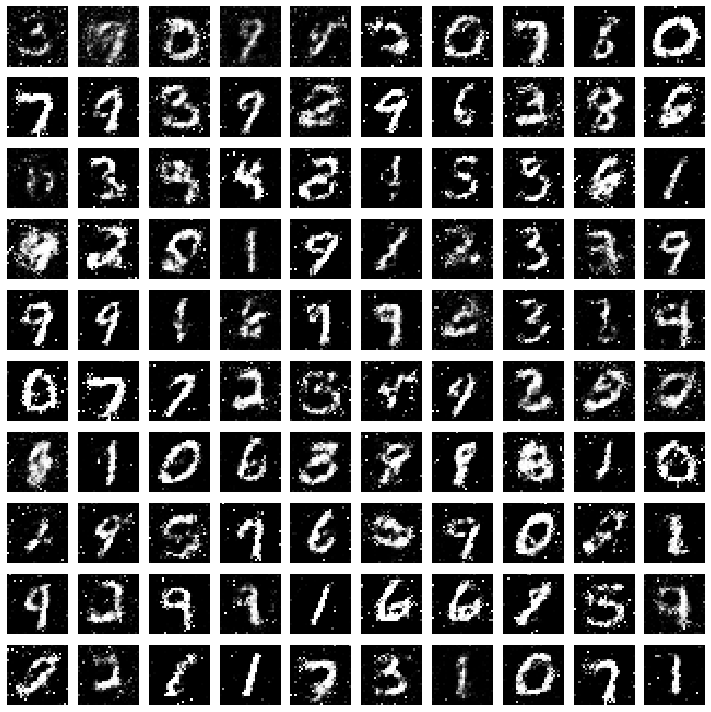

Epoch 19 Disc Loss 0.6472 Generator Loss 1.0287


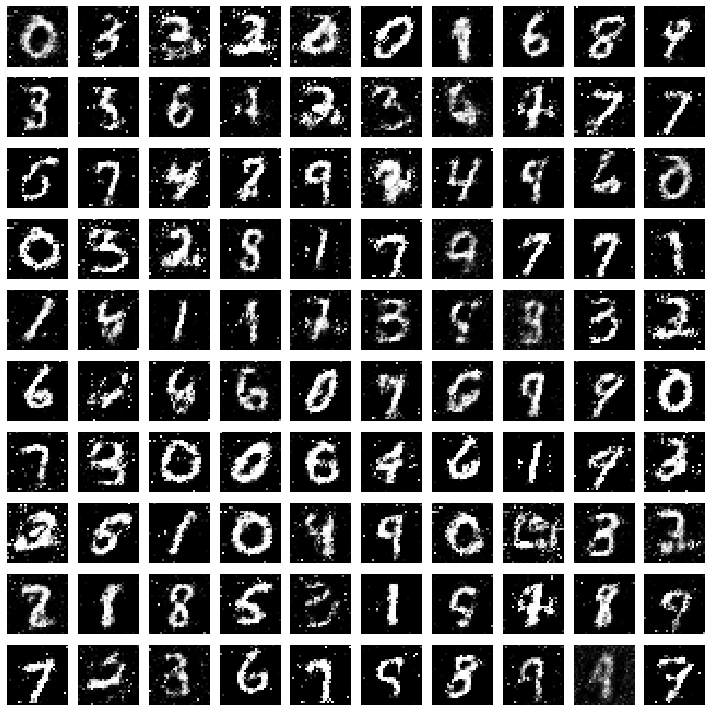

Epoch 20 Disc Loss 0.6525 Generator Loss 1.0215


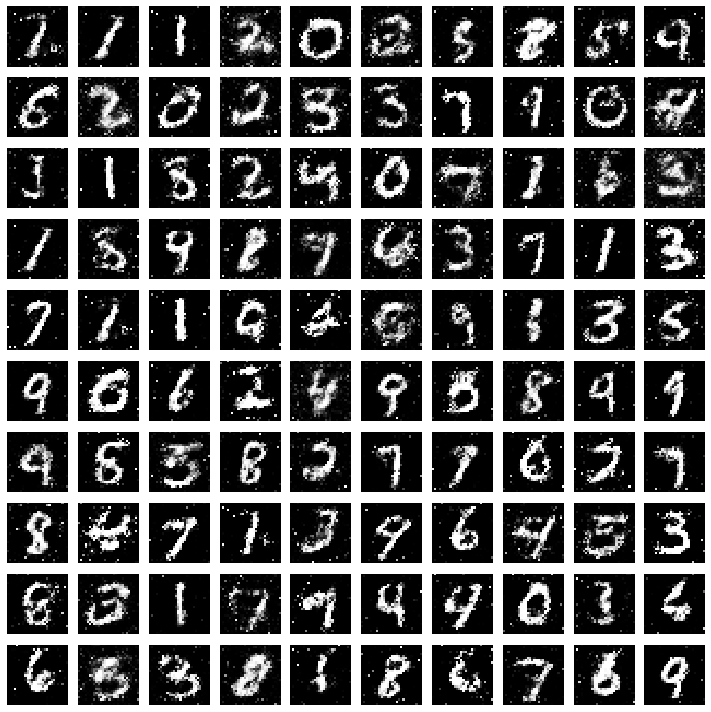

Epoch 21 Disc Loss 0.6516 Generator Loss 1.0153


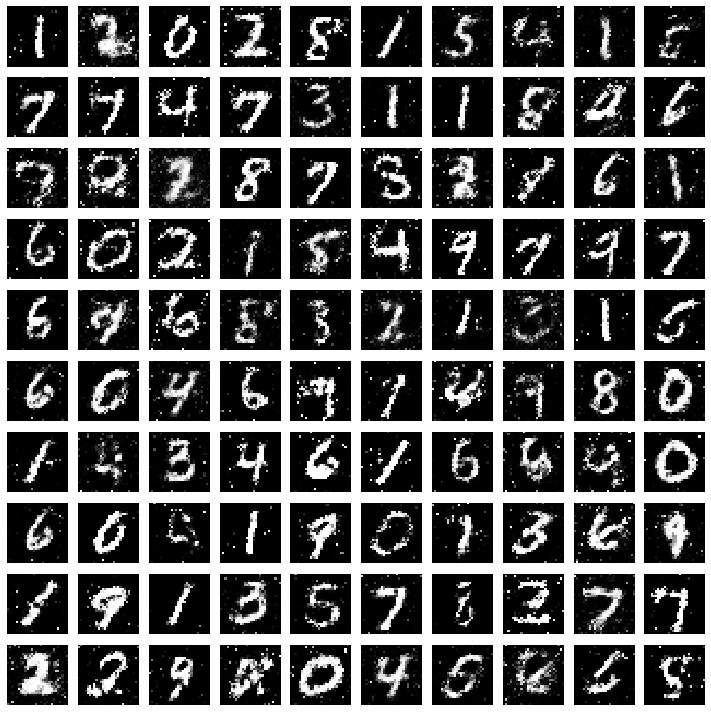

Epoch 22 Disc Loss 0.6531 Generator Loss 1.0091


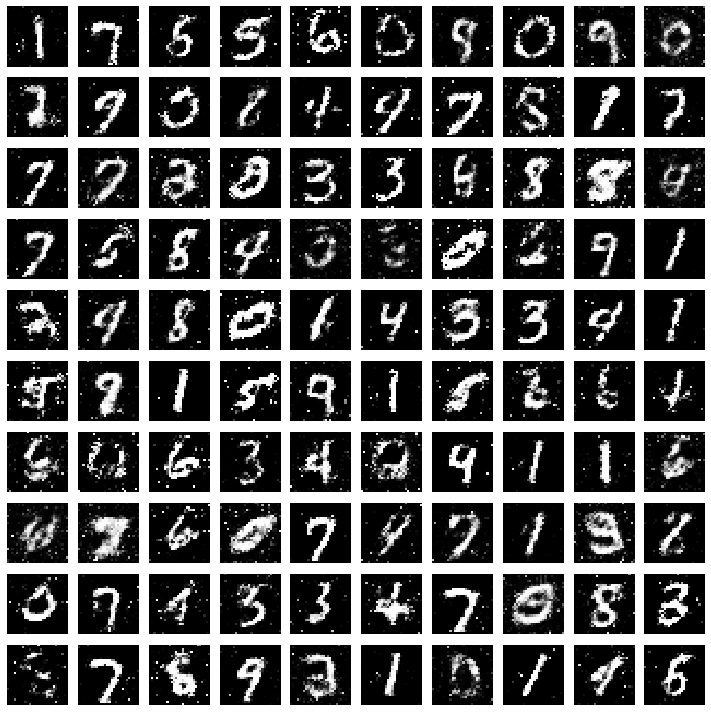

Epoch 23 Disc Loss 0.6534 Generator Loss 1.0161


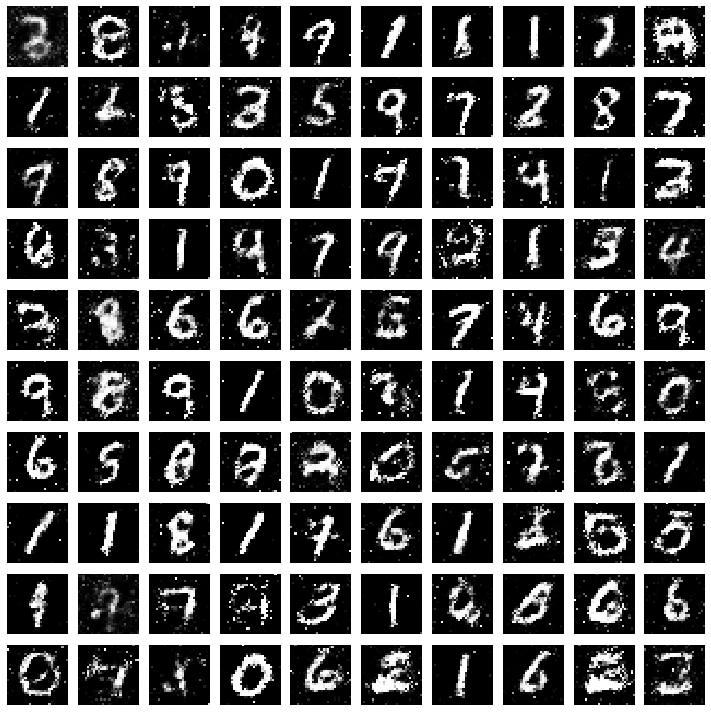

Epoch 24 Disc Loss 0.6548 Generator Loss 1.0106


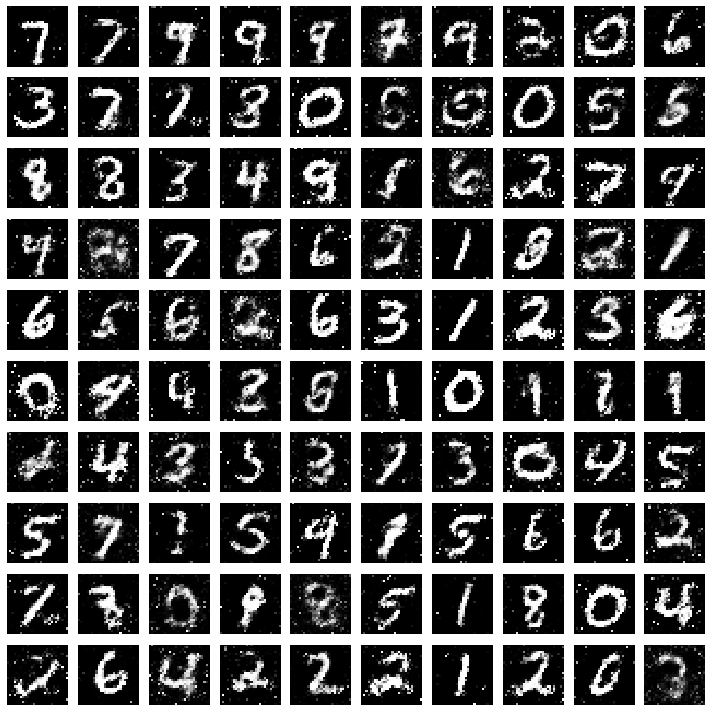

Epoch 25 Disc Loss 0.6592 Generator Loss 0.9940


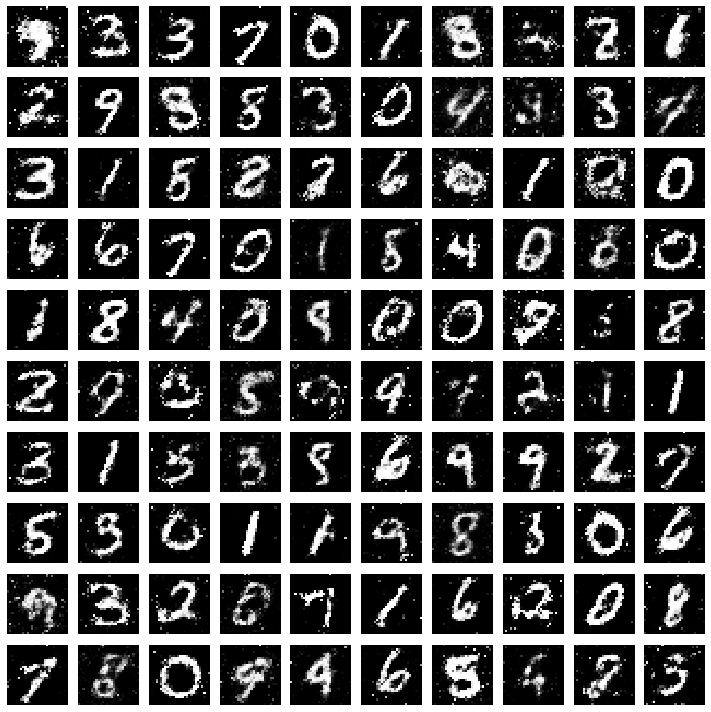

Epoch 26 Disc Loss 0.6589 Generator Loss 0.9926


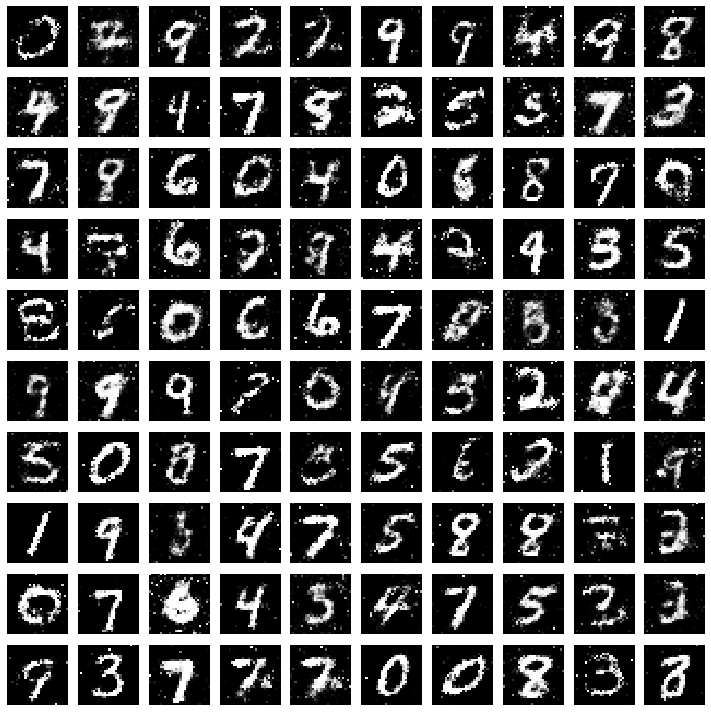

Epoch 27 Disc Loss 0.6585 Generator Loss 0.9960


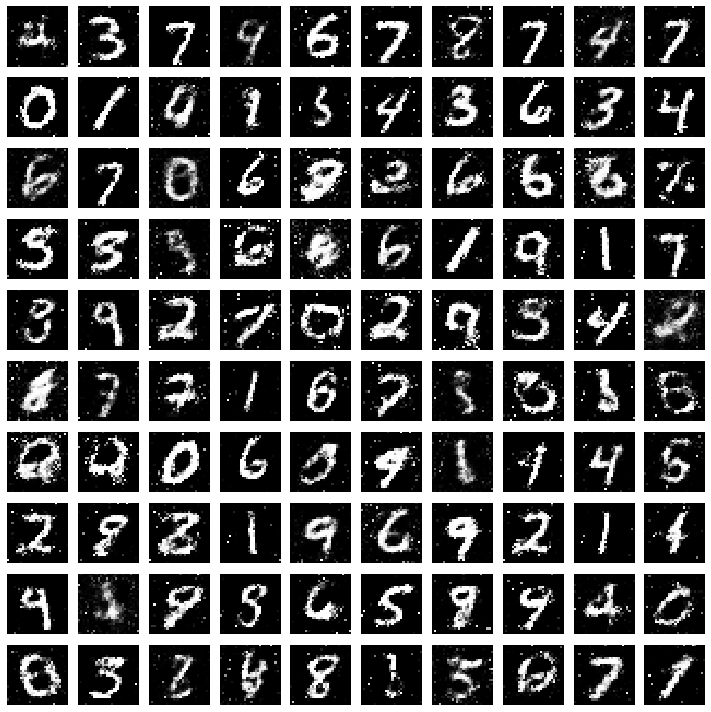

Epoch 28 Disc Loss 0.6608 Generator Loss 0.9948


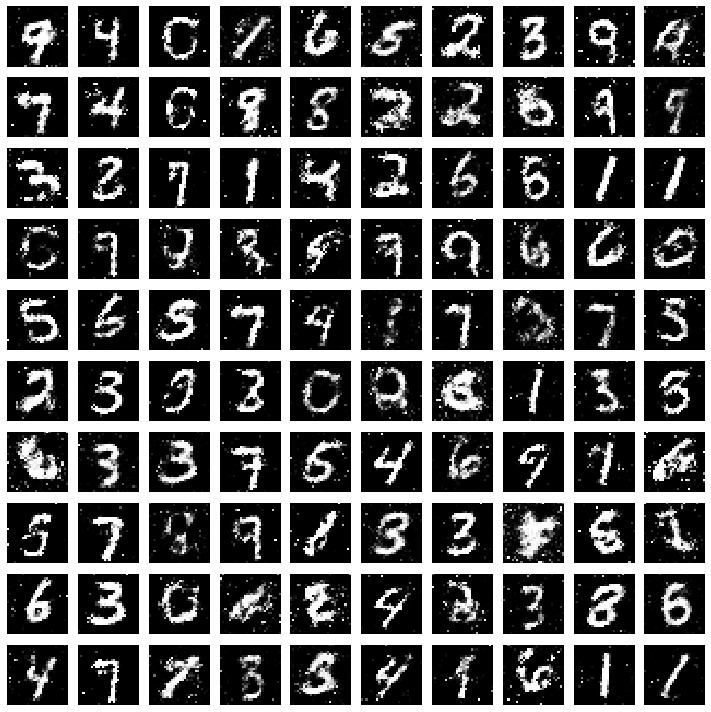

Epoch 29 Disc Loss 0.6583 Generator Loss 1.0039


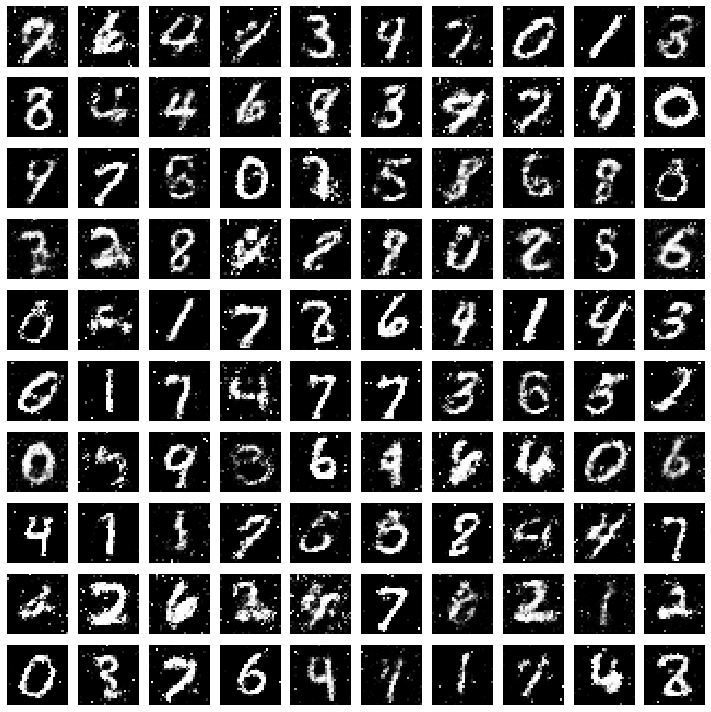

Epoch 30 Disc Loss 0.6577 Generator Loss 1.0007


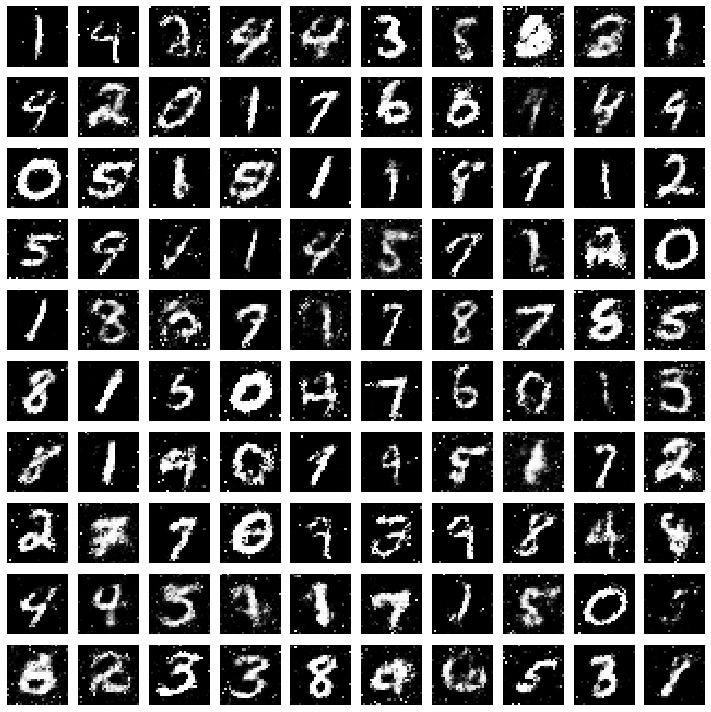

Epoch 31 Disc Loss 0.6585 Generator Loss 1.0059


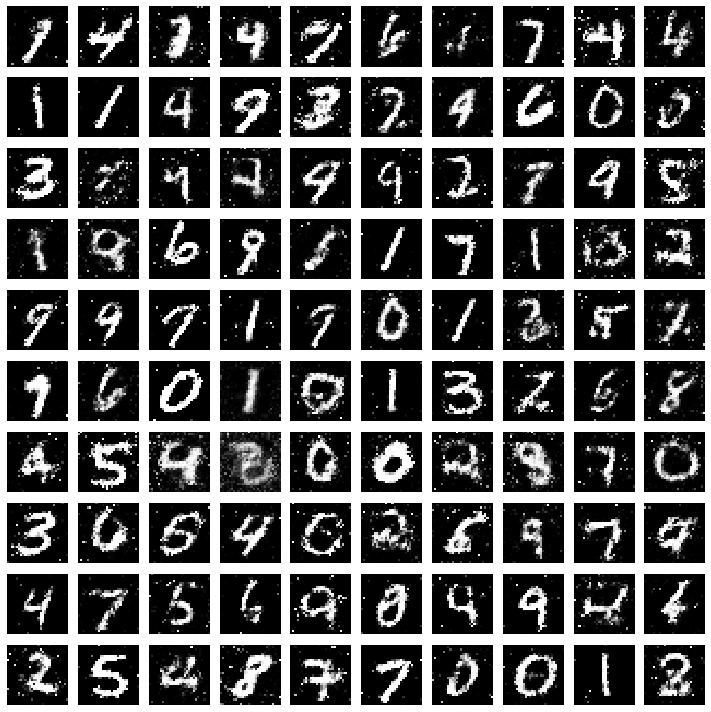

Epoch 32 Disc Loss 0.6610 Generator Loss 0.9946


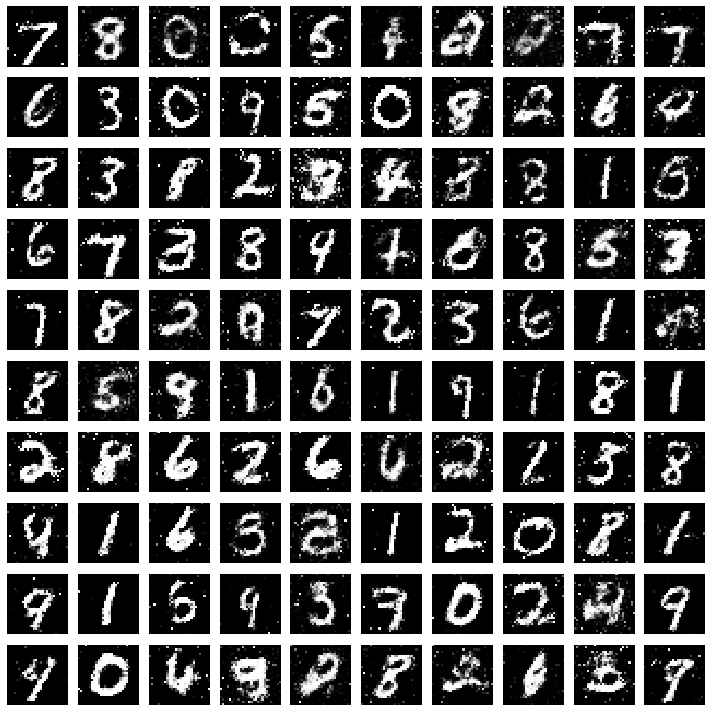

Epoch 33 Disc Loss 0.6584 Generator Loss 0.9997


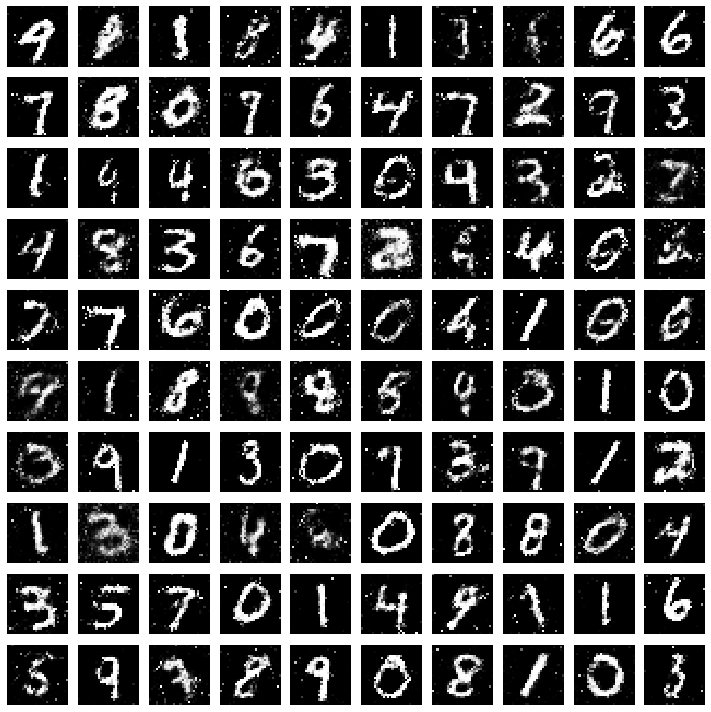

Epoch 34 Disc Loss 0.6614 Generator Loss 0.9947


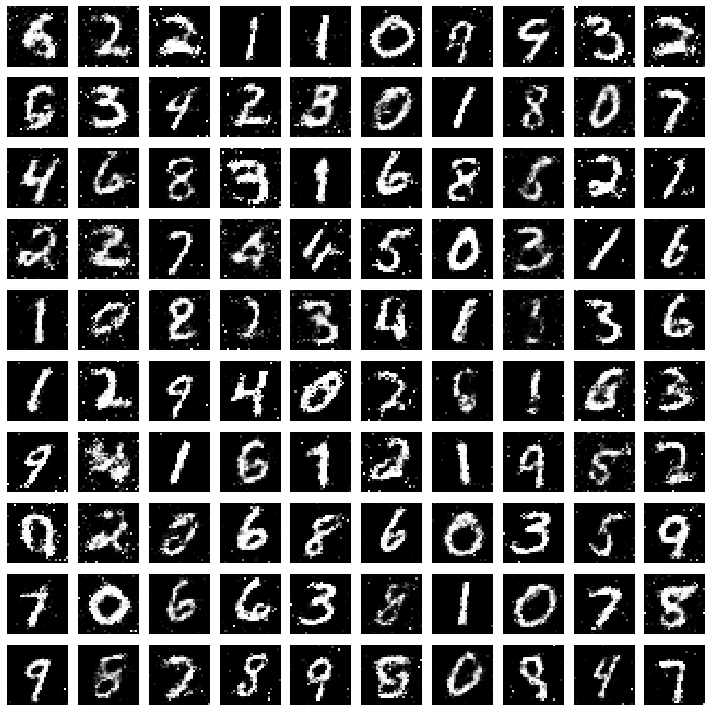

Epoch 35 Disc Loss 0.6600 Generator Loss 0.9909


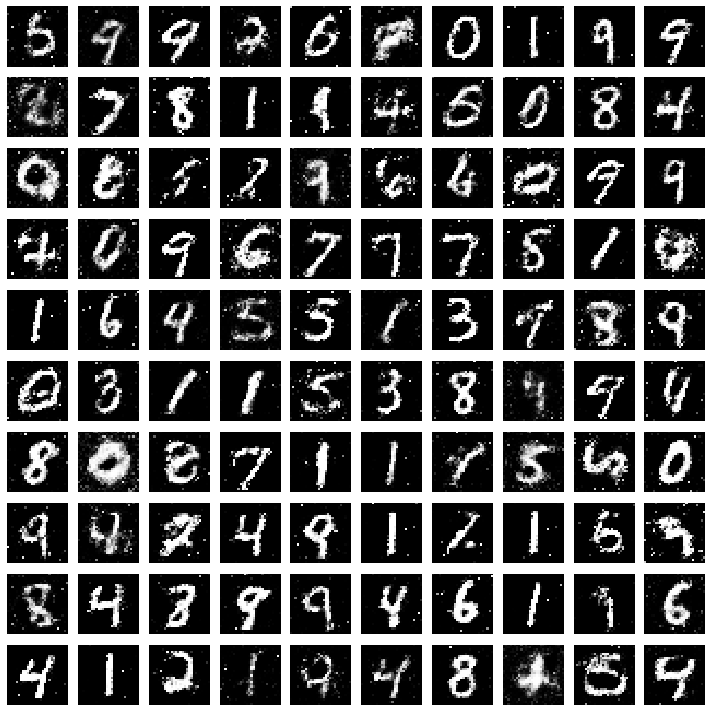

Epoch 36 Disc Loss 0.6620 Generator Loss 0.9972


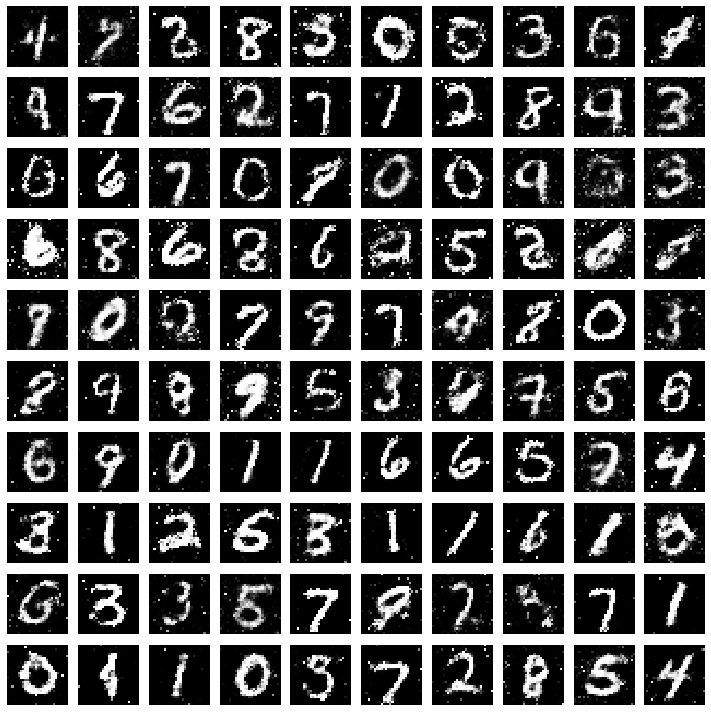

Epoch 37 Disc Loss 0.6622 Generator Loss 0.9906


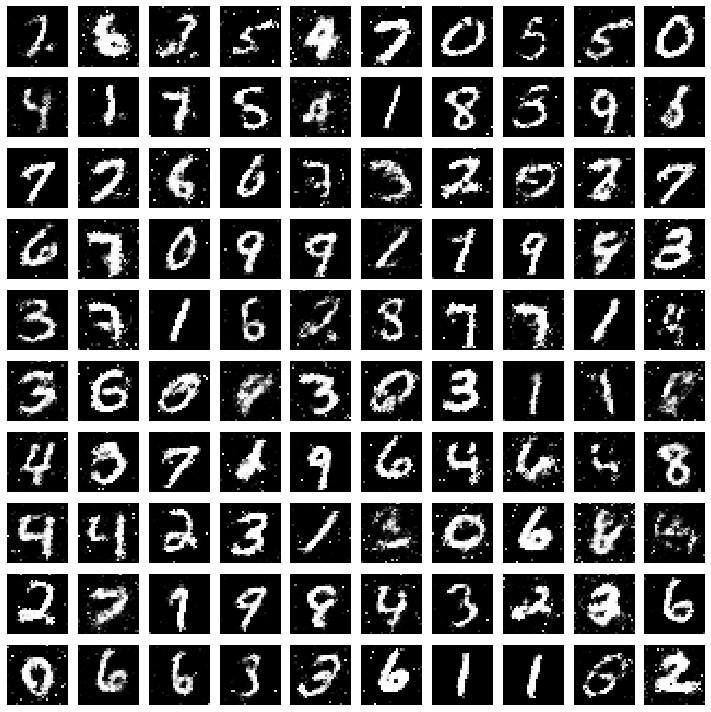

Epoch 38 Disc Loss 0.6632 Generator Loss 0.9900


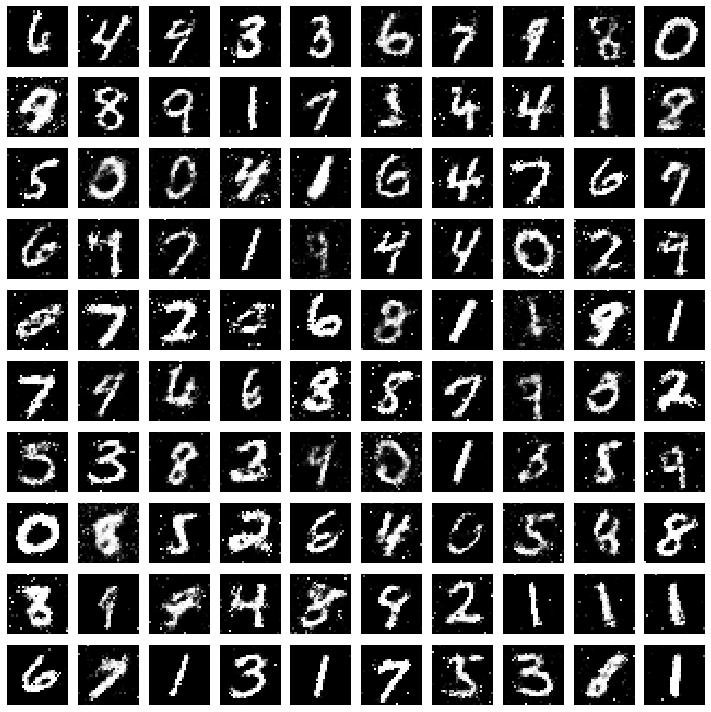

Epoch 39 Disc Loss 0.6621 Generator Loss 0.9863


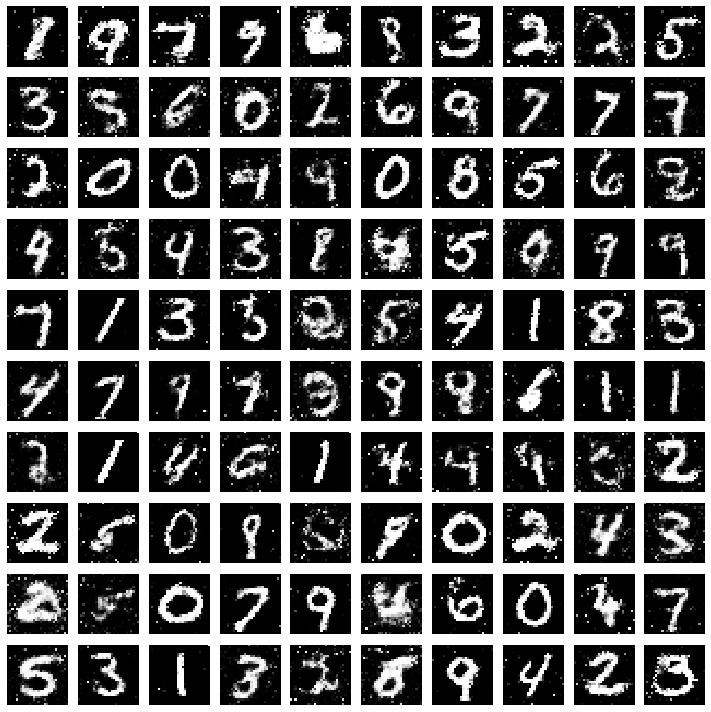

Epoch 40 Disc Loss 0.6637 Generator Loss 0.9908


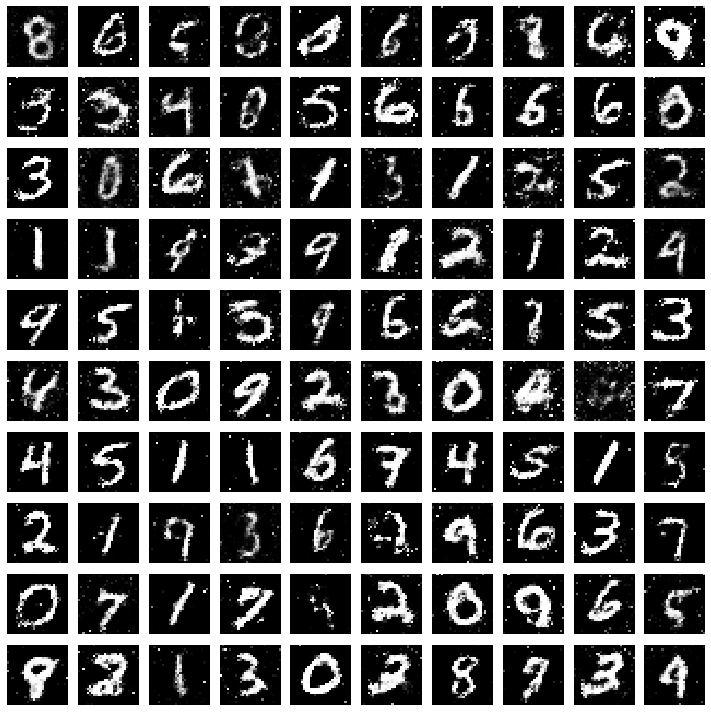

Epoch 41 Disc Loss 0.6653 Generator Loss 0.9853


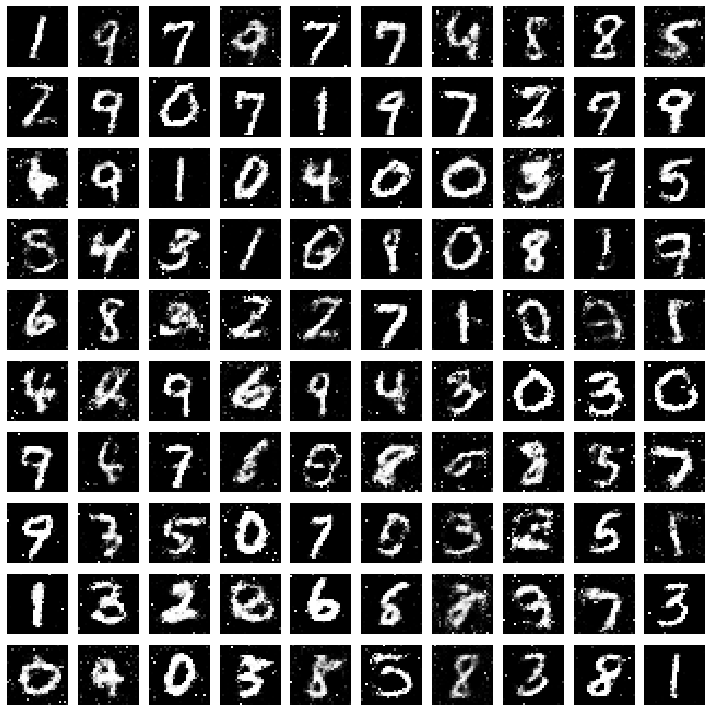

Epoch 42 Disc Loss 0.6657 Generator Loss 0.9831


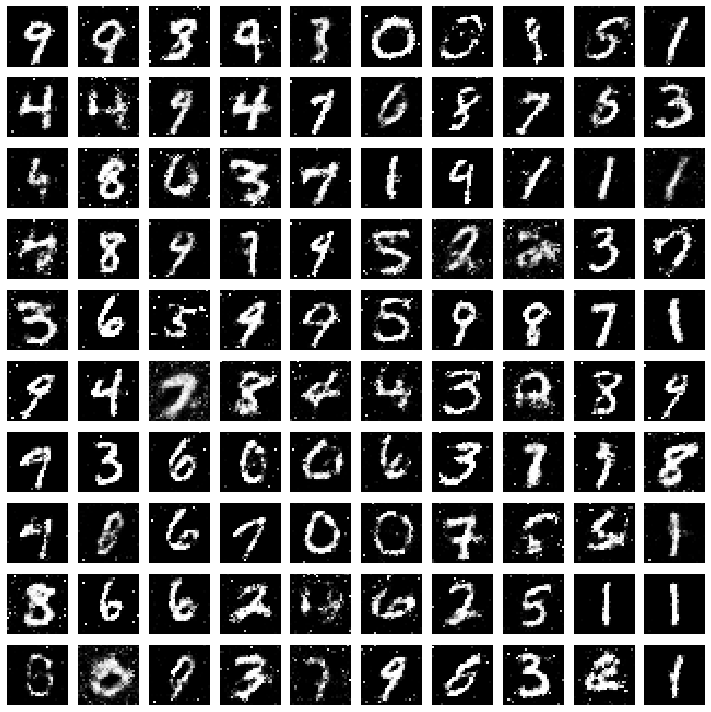

Epoch 43 Disc Loss 0.6652 Generator Loss 0.9840


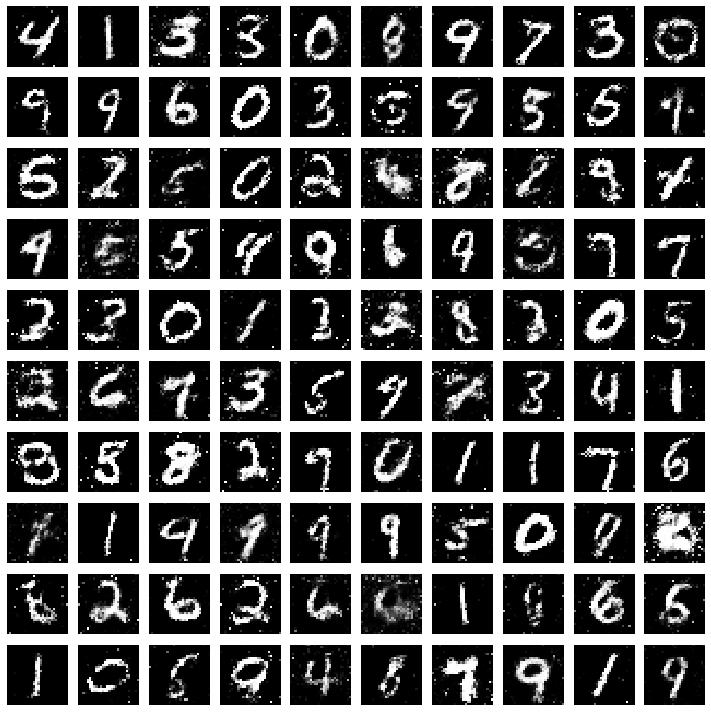

Epoch 44 Disc Loss 0.6655 Generator Loss 0.9827


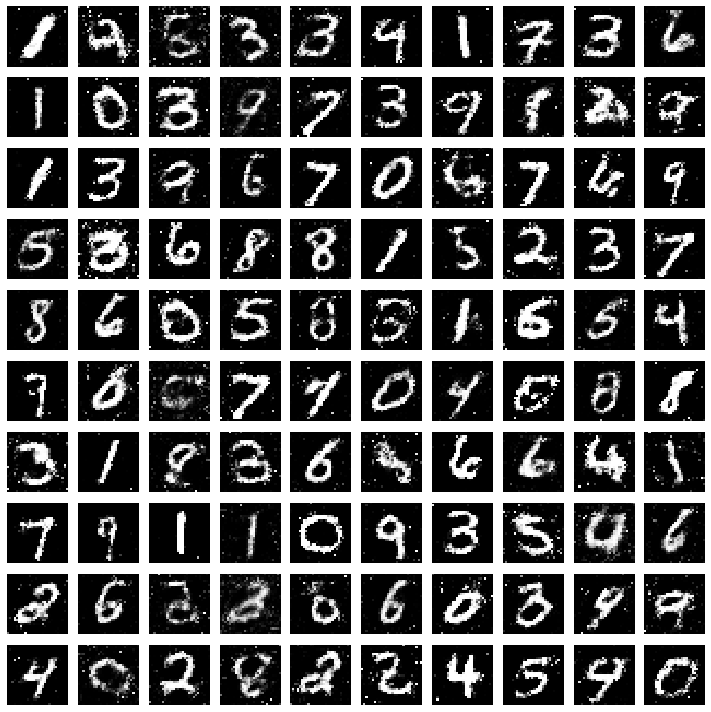

Epoch 45 Disc Loss 0.6659 Generator Loss 0.9812


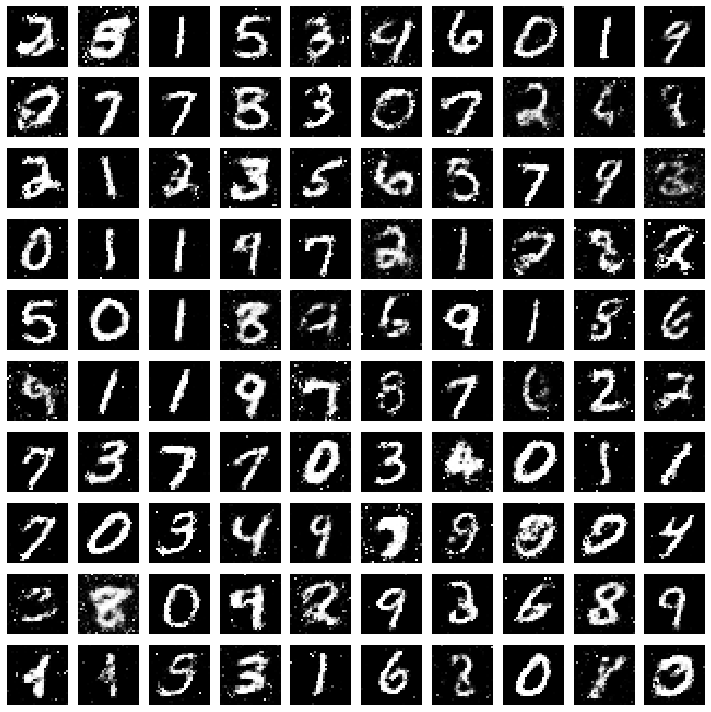

Epoch 46 Disc Loss 0.6668 Generator Loss 0.9893


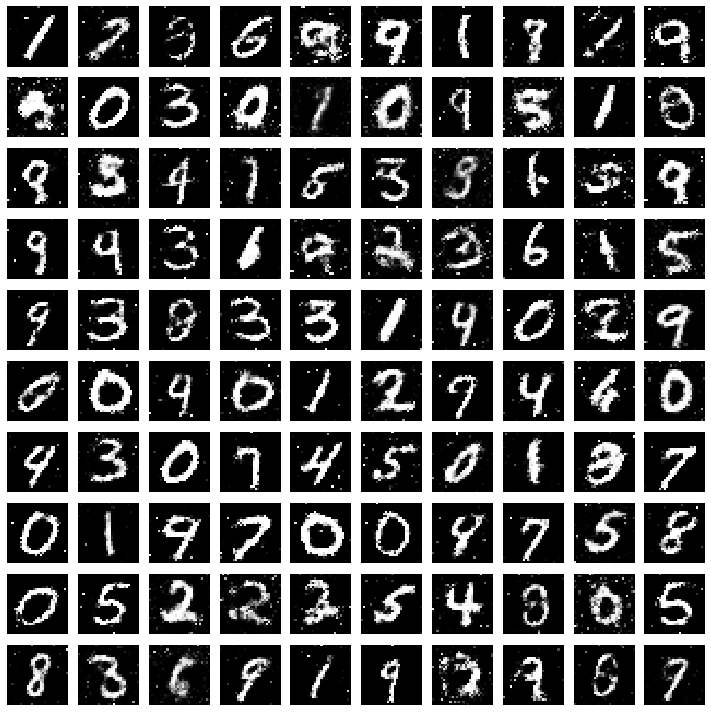

Epoch 47 Disc Loss 0.6665 Generator Loss 0.9847


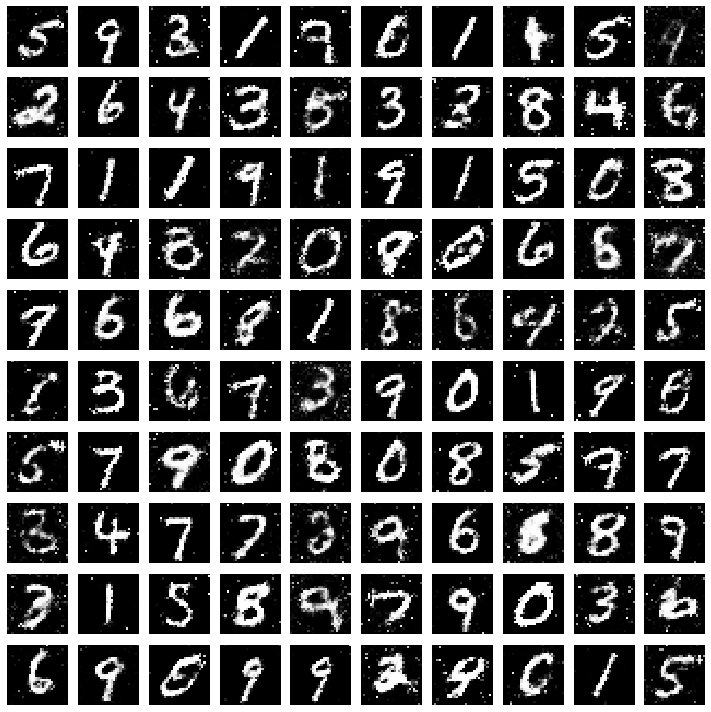

Epoch 48 Disc Loss 0.6658 Generator Loss 0.9832


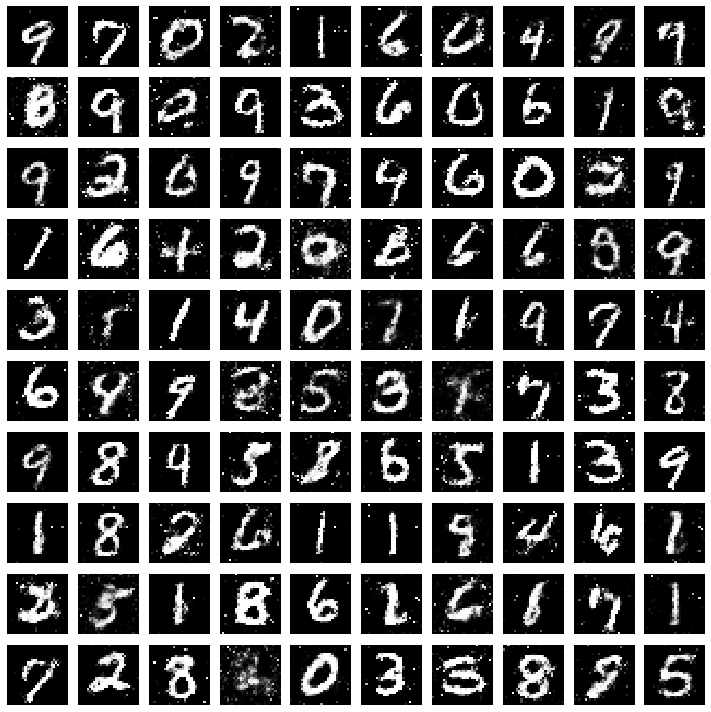

Epoch 49 Disc Loss 0.6659 Generator Loss 0.9814


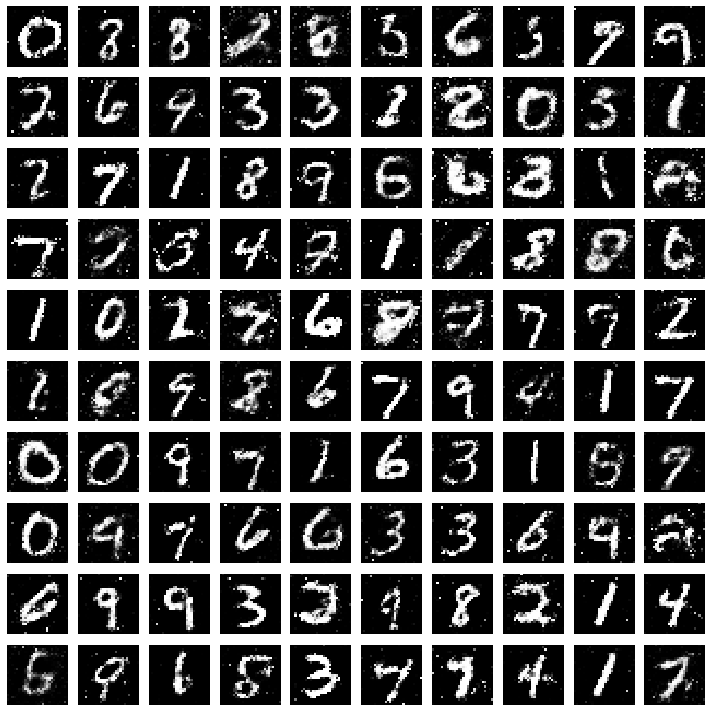

Epoch 50 Disc Loss 0.6678 Generator Loss 0.9816


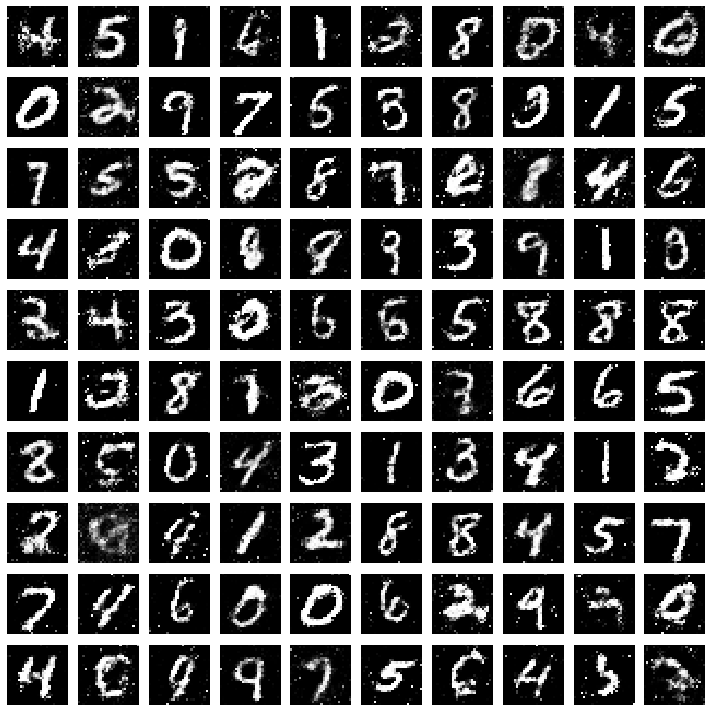

In [0]:
#tRAINING lOOP
for epoch in range(TOTAL_EPOCS):
  epoch_d_loss=0
  epoch_g_loss=0

  #Mini Batch SGD
  for step in range(NO_OF_BATCHES):
    #Step1-Train Discriminator
    #50% Real Data +50% of fake data
    #idx=np.random.randint(low,high,no_of_numbers)
    idx=np.random.randint(0,X_train.shape[0],HALF_BATCH)
    real_imgs=X_train[idx]


    #FAKE data
    noise=np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
    fake_imgs=Generator.predict(noise) #Forward

    #Lables
    real_y=np.ones((HALF_BATCH,1))*0.9 # One sided label smoothing for discriminator
    fake_y=np.zeros((HALF_BATCH,1))

    #Train our Discriminator
    d_loss_real=Discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake=Discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss+=d_loss

    #Train Generator (Considering Frozen Discriminator)
    noise=np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y=np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss+=g_loss

  print("Epoch %d Disc Loss %.4f Generator Loss %.4f"%((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
  save_imgs(epoch)
  if((epoch+1)%5==0):
    Generator.save("model/gan_generator_{0}.h5".format(epoch+1))